In [1]:
import pandas as pd
from pandas import Series, DataFrame
#All we need at first is pandas and dataframes so we can start analyzing data

In [2]:
titanic_df = pd.read_csv('train.csv',sep=',')
#Here is our standard method of opening the csv file.  I forgot to check the separator and had to go back.

In [3]:
titanic_df.head()
#This is our standard way of seeing the first 5 items with categories

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()
#This is another we to see the head that also give more data about each category.
#It is here that we can first notcie that our two biggest categories of missing (null) info
# are Cabin and Age respectively.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

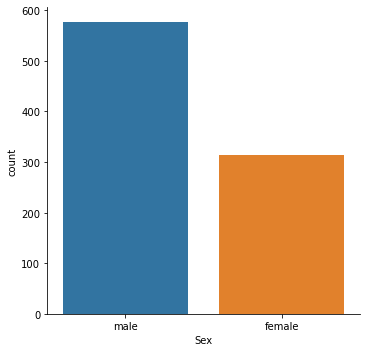

In [6]:
#Before we did anything we created a list of quesitons to help guide our efforts.
#The first of the questions was 'Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)''
sns.catplot('Sex',kind='count',data=titanic_df)
#The factorplot used by the instructor had been depracated and I had to figure out how to use catplot in its place.
#Unfortunately, it took some searching to figure out that the 'kind' attribute had to be used differntly
# than shown in the tool tips.  Usually, it would be used after the data parameter to indicate the kind of plot.
# Instead, I had to use it immediately after the x parameter to indicate I need y to be a count and I need
# a bar plot

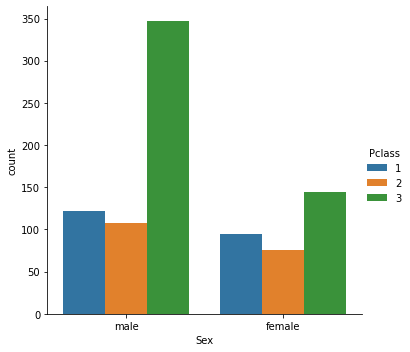

In [7]:
sns.catplot('Sex',kind='count',data=titanic_df, hue='Pclass')
#We can add another category under the 'hue' parameter

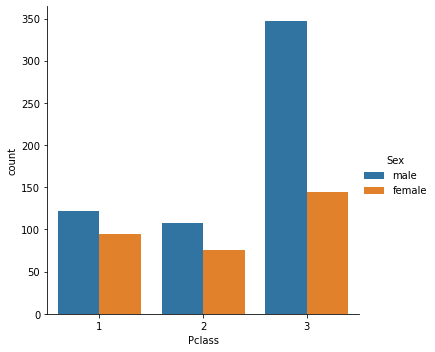

In [8]:
sns.catplot('Pclass', kind='count', data=titanic_df, hue='Sex')

In [9]:
#Here we create a custom function so that we can apply it to the dataframe.
#The function itself only identifies and names passengers <16 'child'.
def child_or(passenger):
    age,sex = passenger
    if age <16:
        return 'child'
    else:
        return sex
#This final line creates a new column in our dataframe called 'person'
# that equals the 'age' and 'sex' categories of the same dataframe and applies our function to it
titanic_df['person']=titanic_df[['Age','Sex']].apply(child_or,axis=1)    

In [10]:
#This creates the new column with either male, female, or child in it and is an exmaple of feature creation.

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


By creating features from the data you have at your disposal, it is possible to see answers that were previously hidden.
It also makes for better models in machine learning and this is where a level of creativity / critical thinking is beneficial.

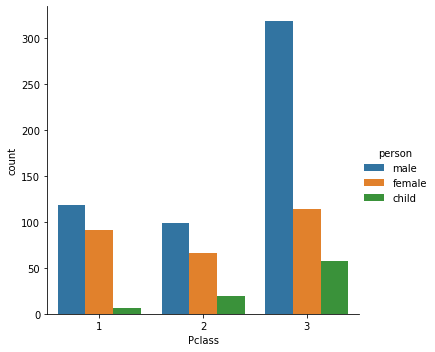

In [11]:
sns.catplot('Pclass', kind='count', data=titanic_df, hue='person')

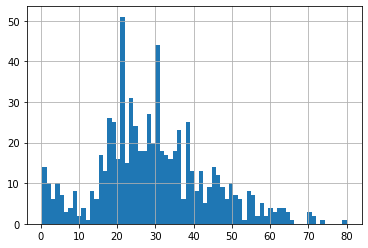

In [12]:
#In order to explore actual ages more closely we can creat a histogram
titanic_df['Age'].hist(bins=70)

In [13]:
# to find the mean age we can do the following:
titanic_df['Age'].mean()

29.69911764705882

In [14]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

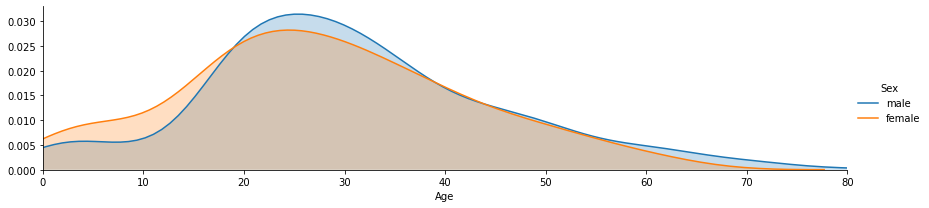

In [25]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

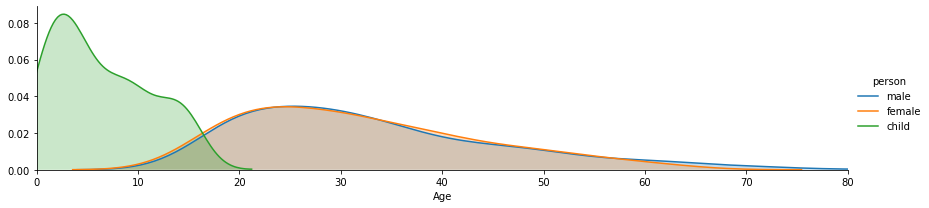

In [26]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

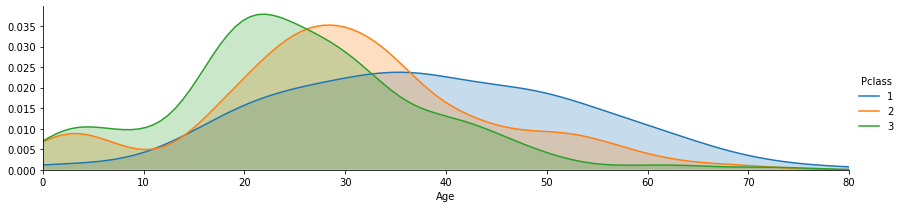

In [27]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [29]:
deck = titanic_df['Cabin'].dropna()

In [30]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

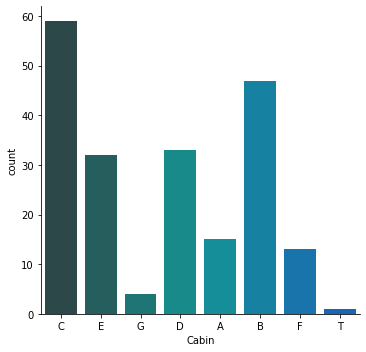

In [33]:
levels = []
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',kind ='count', data=cabin_df, palette='winter_d')


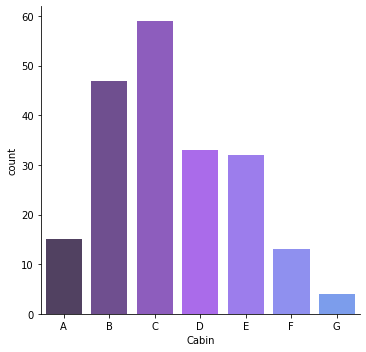

In [51]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot('Cabin',kind ='count', data=cabin_df, order=['A','B','C','D','E','F','G'], palette='cool_d')

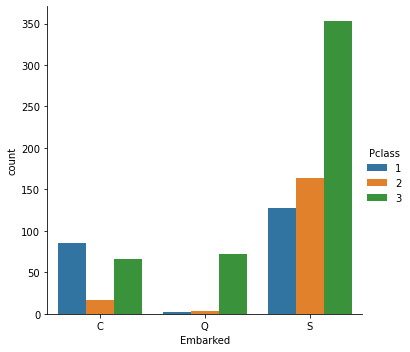

In [47]:
# Here we had taken a couple of days off from study due to work.
# This resulted in my forgetting that the instructor uses a deprecated factorplot that I must replace with catplot.
# There are also different syntax rules for my plot and it was easy to forget.
# Specifically, the instructor uses x_plot as a parameter of factorplot.
# This must be replaced with order as a parameter of catplot.  Don't for get to use kind='count' to mimic factorplot completely.
sns.catplot('Embarked', kind='count', data=titanic_df, hue='Pclass', order=["C","Q","S"])

In [52]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [53]:
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [54]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\fitmi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


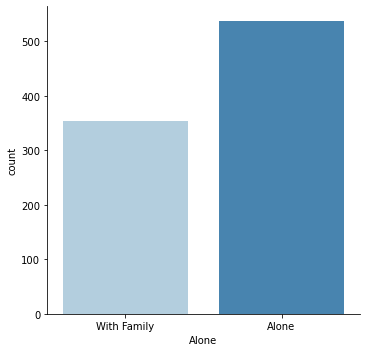

In [56]:
sns.catplot('Alone',kind='count', data=titanic_df, palette='Blues' )

In [57]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no', 1:'yes'})

In [58]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


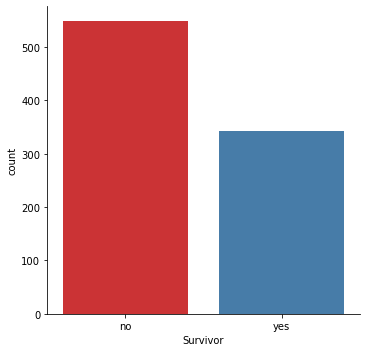

In [66]:
sns.catplot('Survivor',kind='count', data=titanic_df, palette='Set1' )

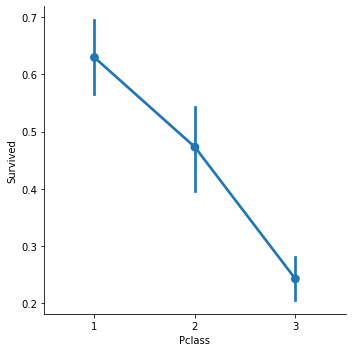

In [72]:
# IN order to mimic the instructor's deprecated factorplot,
# I used a catplot, but had to change the kind='count' to 'point' 
sns.catplot('Pclass','Survived',kind='point', data=titanic_df)

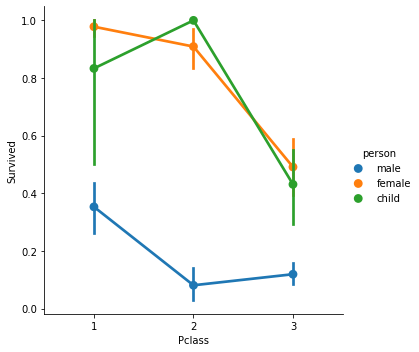

In [73]:
sns.catplot('Pclass','Survived',kind='point', hue='person',data=titanic_df)

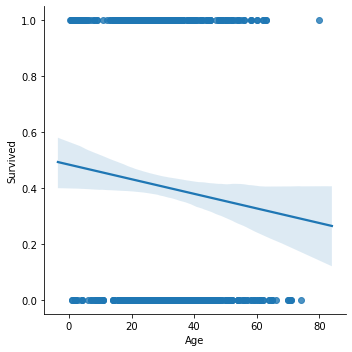

In [74]:
sns.lmplot('Age', 'Survived', data=titanic_df)

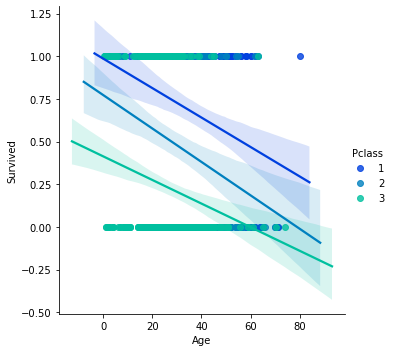

In [77]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter')

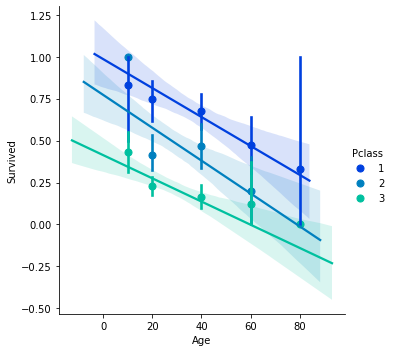

In [79]:
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)
#creating a bin of ages with the variable, generations and implementing via x_bins cleans the graph up considerably

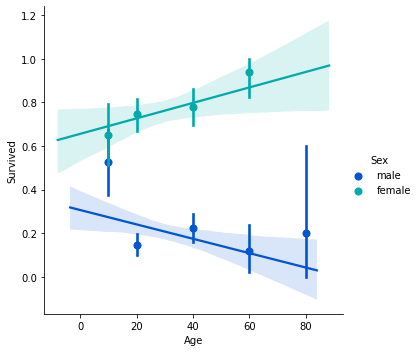

In [80]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)